# TEXT MINING AND SEARCH 
## EXPLORATION 

In [1]:
import pandas as pd                  
import numpy as np                  
import string                        
import re                            
from matplotlib import pyplot as plt 
from matplotlib import cm
from imblearn.over_sampling import SMOTE
from collections import OrderedDict
import seaborn as sns                
from pprint import pprint            
from collections import Counter     
from wordcloud import WordCloud      
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
        
import nltk
from nltk.corpus import stopwords            
from nltk.stem import PorterStemmer          
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer      
import textblob
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import CountVectorizer      
from sklearn.feature_extraction.text import TfidfVectorizer      
from sklearn.decomposition import TruncatedSVD                             
from sklearn.model_selection import train_test_split             
from sklearn.metrics import classification_report                 
from sklearn.ensemble import RandomForestClassifier              
from sklearn.cluster import KMeans                               
from sklearn.metrics import confusion_matrix                     
from sklearn.metrics.cluster import normalized_mutual_info_score 
from sklearn.cluster import DBSCAN                               
from sklearn.cluster import AgglomerativeClustering              
from sklearn.neighbors import KNeighborsClassifier               
from scipy.sparse import random as sparse_random
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

### For the first part of the project we develop an explanotary phase where we describe the dataset, we chech the rpesence of Nan values, we delete the duplicates (choices by the text and UserID) and select only the most important features. 
One of the major is that the dataset is unbalance, so we create 5 samples for each type of score (one star, two stras etc.) with 30000 reviews.  

In [2]:
amazon = pd.read_csv('/Users/matteo/Desktop/DATA SCIENCE/Text Mining and Search/ProgettoText/Reviewsprogettoamazon.csv')    
amazon.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [3]:
amazon_datasetoriginale = amazon 

In [4]:
print("numbers of record: " + str(len(amazon)))
amazon.info()

numbers of record: 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
#CHECK NA VALUES 
amazon.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
amazon.describe()
#summary

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09

In [7]:
#DROP DUPLICATES  
amazon = amazon.drop_duplicates(subset = {"UserId", "ProfileName","Time","Text"})

In [8]:
#FEATURE SELECTION 
# prendo in considerazione solo quello che mi serve
amazon = amazon.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'], axis = 1)

In [9]:
print("numero di record: " + str(len(amazon)))

numero di record: 393933


Text(0, 0.5, 'Frequenza')

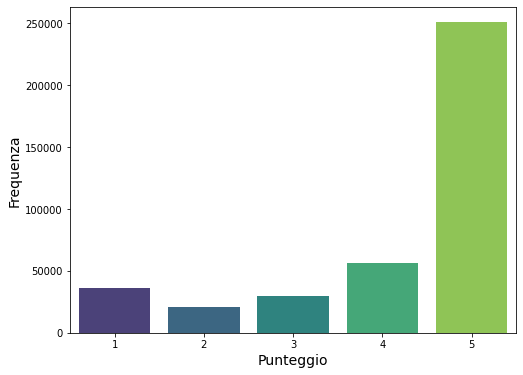

In [10]:
#Osservo la distribuzione del punteggio (Score):
plt.figure(figsize = (8, 6))
sns.countplot(amazon["Score"],palette="viridis")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)
#THE DATASET IS UNBALANCED, IT IS MANDATORY TO BALANCED THE SCORES TO APPLY A SUPERVISIONATED APPROACH 

In [11]:
#Osservo il numero di recensioni per ogni punteggio dato:
print(amazon['Score'].loc[amazon['Score'] == 1 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 2 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 3 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 4 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 5 ].sum())

36306
41604
89307
224376
1254810


In [12]:
#BALANCING
#we have selected 30000 rows with a single score value and we concatenate the five varaibles to obtain an unique dataframe
fraud1_df = amazon.loc[amazon['Score'] == 1].sample(n=25000,random_state=42, replace = True)
fraud2_df = amazon.loc[amazon['Score'] == 2].sample(n=25000,random_state=42, replace = True)
fraud3_df = amazon.loc[amazon['Score'] == 3].sample(n=50000,random_state=42, replace = True)
fraud4_df = amazon.loc[amazon['Score'] == 4].sample(n=25000,random_state=42, replace = True)
fraud5_df = amazon.loc[amazon['Score'] == 5].sample(n=25000,random_state=42, replace = True)

Text(0, 0.5, 'Frequenza')

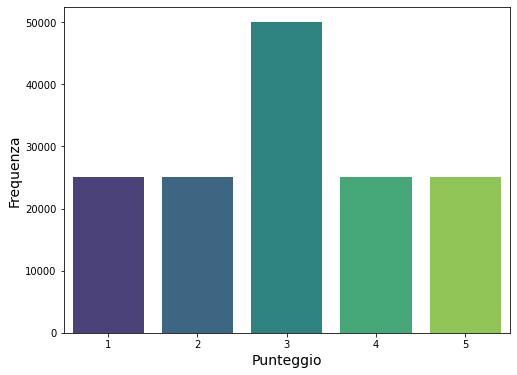

In [13]:
#Riunisco tutti i sottodataset che erano stati precedentemente ottenuti:
amazon = pd.concat([fraud1_df,fraud2_df,fraud3_df,fraud4_df,fraud5_df])

#Verifico che effettivamente ora i punteggi siano bilanciati:
plt.figure(figsize = (8, 6))
sns.countplot(amazon["Score"],palette="viridis")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)
#THE DATASET RESULTS MORE BALANCED

In [14]:
#vado a calcolare la lunghezza della recensione di ogni testo:
amazon['len_text'] = amazon['Text'].str.len()
plt.figure(figsize = (8, 6))
sns.countplot(amazon["len_text"],color="red")
plt.xlabel("Lunghezza recensione", size = 14)
plt.ylabel("Frequenza", size = 14)

KeyboardInterrupt: 

In [17]:
#Elimino la colonna "len_text" precedentemente creata:
amazon = amazon.drop(['len_text'], axis=1)

# TEXT PREPROCESSING 
In this phase of the project we apply the following functions:
- remove white space 
- lower case 
- remove stop words 
- remove punctuation 
- remove URLS
- Tokenization 
- Stemming 

In [18]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1076)>


False

In [19]:
amazon["Text_stemming"] = amazon["Text"].str.lower() #LOWER CASE

amazon['Text_stemming'] = amazon['Text_stemming'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

stemmer = PorterStemmer()
def stem_words(text):
  return " ".join([stemmer.stem(word) for word in text.split()])

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: stem_words(text)) #STAMMING

amazon['Text_stemming'] = amazon.apply(lambda row: nltk.word_tokenize(row['Text_stemming']), axis=1) #TOKENIZATION 

print(".")
print("OPERAZIONE COMPLETATA")
print(".")

.
OPERAZIONE COMPLETATA
.


In [20]:
#Vado ad osservare solamente le prime tre row, solamente per vedere come si presenta attualmente il testo:
amazon.head(3)

Score                                               Text  \
212969      1  Note: This review is specifically for this Cat...   
9648        1  Well I bought these to have a "Food Tripping P...   
142253      1  Buyer beware.  Read  COMPLETELY  when and what...   

                                            Text_stemming  
212969  [note, review, specif, cat, food, sold, amazon...  
9648    [well, bought, food, trip, parti, wife, spread...  
142253  [buyer, bewar, read, complet, get, much, confu...

In [21]:
amazon["Text_lemmatization"] = amazon["Text"].str.lower() #LOWER CASE

amazon['Text_lemmatization'] = amazon['Text_lemmatization'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    
amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
from textblob import Word

amazon['Text_lemmatization'] = amazon['Text_lemmatization'].apply(lambda x: "".join([Word(word).lemmatize() for word in x])) #LEMMATIZATION

amazon['Text_lemmatization'] = amazon.apply(lambda row: nltk.word_tokenize(row['Text_lemmatization']), axis=1) #TOKENIZATION 

print(".")
print("OPERAZIONE COMPLETATA")
print(".")

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
.
OPERAZIONE COMPLETATA
.


In [22]:
#Si crea una nuova classificazione di Score ma in base al fatto se lo Score è positivo, negativo o neutro. 
maskpos = (amazon['Score'] > 3)
maskneg = (amazon['Score'] < 3)
masknet = (amazon['Score'] == 3)
amazon.insert(0,"3classscore",0)
amazon['3classscore'].loc[maskpos] = 1
amazon['3classscore'].loc[maskneg] = -1
amazon['3classscore'].loc[masknet] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Esplorazione dei testi delle review tramite Wordcloud e Conteggio delle parole principali più utilizzate

In [23]:
amazon["Text_clean"] = amazon["Text"].str.lower() #LOWER CASE

amazon["Text_clean"] = amazon["Text_clean"].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_clean"] = amazon["Text_clean"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

amazon["Text_clean"] = amazon["Text_clean"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_clean"] = amazon["Text_clean"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure
#filter the df to one candidate, and create a list of responses from them
text_perwordcloud = amazon.Text_clean.tolist() 

# join the list and lowercase all the words
text_perwordcloud = ' '.join(text_perwordcloud).lower()

#create the wordcloud object
wordcloud_1 = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text_perwordcloud)


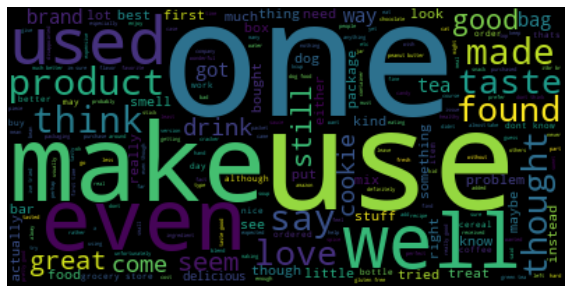

In [25]:
#plot the wordcloud object
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_1, interpolation='bilInear')
plt.axis('off')
plt.show()

In [26]:
from collections import Counter
results_conteggiointero = Counter()
amazon["Text_stemming"].apply(results_conteggiointero.update)
#print(results)
results_conteggiointero = pd.DataFrame.from_dict(results_conteggiointero, orient='index').reset_index()
results_conteggiointero = results_conteggiointero.rename(columns={"index": "Parola", 0 : "Conteggio"})
results_conteggiointero = results_conteggiointero.sort_values(by='Conteggio', ascending=False)
results_conteggiointero.head()

Parola  Conteggio
227     like      91152
245     tast      86095
13        br      85547
353   flavor      63932
308  product      59366

[(0.0, 95000.0),
 Text(0.5, 0, 'Conteggio Parola'),
 Text(0, 0.5, 'Parola'),
 Text(0.5, 1.0, 'Conteggio Parole Text Amazon Review')]

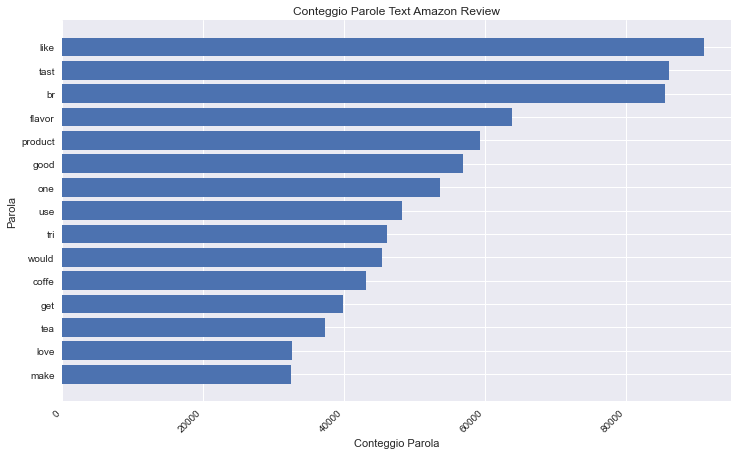

In [54]:
conteggiowordcloud1valoritop15 = results_conteggiointero.head(15)
conteggiowordcloud1valoritop15 = conteggiowordcloud1valoritop15.sort_values("Conteggio", ascending= True)

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(conteggiowordcloud1valoritop15['Parola'], conteggiowordcloud1valoritop15['Conteggio'])
labels = ax.get_xticklabels()
plt.style.use('seaborn')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 95000], xlabel='Conteggio Parola', ylabel='Parola',
       title='Conteggio Parole Text Amazon Review')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure
#filter the df to one candidate, and create a list of responses from them
text = amazon.Text.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)


In [ ]:
#plot the wordcloud object
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# TEXT REPRESENTATION AND CLASSIFICATION FOR STEMMED TEXT
We represent the text in two different ways: Bag of Words and TD-IDF. 
Cause the computational diffculty to perfomr the algorthms we decide to apply a dimensionl reduction of maximum 300 features.  

## BAG OF WORDS - STEMMED

In [27]:
#Effettuiamo lo stemming;
amazon['Text_stemming'] = amazon['Text_stemming'].apply(str)
text_stemmed = amazon['Text_stemming']

In [28]:
#Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_stemmed =  vectorizer.fit_transform(text_stemmed)

In [29]:
#print(vectorizer.get_feature_names())

['10', '100', '12', '13', '14', '15', '16', '20', '24', '25', '30', '40', '50', 'abl', 'absolut', 'accord', 'acid', 'actual', 'ad', 'add', 'addict', 'addit', 'admit', 'adult', 'advertis', 'aftertast', 'ago', 'agre', 'air', 'allergi', 'allow', 'almond', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'amaz', 'amazon', 'american', 'amount', 'anim', 'anoth', 'anymor', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'appar', 'appeal', 'appear', 'appl', 'appreci', 'area', 'arent', 'aroma', 'around', 'arriv', 'artifici', 'ask', 'assum', 'ate', 'avail', 'averag', 'avoid', 'aw', 'away', 'awesom', 'babi', 'back', 'bacon', 'bad', 'bag', 'bake', 'balanc', 'ball', 'banana', 'bar', 'bare', 'base', 'basic', 'batch', 'bean', 'bear', 'beauti', 'becom', 'beef', 'believ', 'benefit', 'berri', 'best', 'better', 'beverag', 'big', 'bigger', 'biscuit', 'bit', 'bite', 'bitter', 'black', 'bland', 'blend', 'blood', 'blue', 'blueberri', 'bodi', 'boil', 'bold', 'bone', 'boost', 'bothe

In [87]:
#SET UP DI 1000 FEATURE
print(text_bagofwords_stemmed.shape)
#print(text_bagofwords_stemmed)

(150000, 1000)
  (0, 585)	1
  (0, 731)	1
  (0, 150)	10
  (0, 348)	14
  (0, 811)	1
  (0, 624)	1
  (0, 670)	12
  (0, 692)	3
  (0, 120)	11
  (0, 315)	1
  (0, 647)	1
  (0, 409)	3
  (0, 457)	2
  (0, 285)	3
  (0, 586)	2
  (0, 300)	4
  (0, 967)	2
  (0, 588)	1
  (0, 257)	5
  (0, 824)	1
  (0, 587)	1
  (0, 211)	1
  (0, 494)	1
  (0, 41)	17
  (0, 612)	2
  :	:
  (149999, 710)	1
  (149999, 935)	1
  (149999, 395)	1
  (149999, 501)	1
  (149999, 740)	1
  (149999, 751)	1
  (149999, 518)	2
  (149999, 255)	1
  (149999, 272)	1
  (149999, 380)	1
  (149999, 528)	1
  (149999, 184)	1
  (149999, 235)	1
  (149999, 936)	2
  (149999, 940)	1
  (149999, 926)	1
  (149999, 188)	1
  (149999, 888)	1
  (149999, 668)	1
  (149999, 434)	1
  (149999, 369)	1
  (149999, 772)	1
  (149999, 929)	1
  (149999, 819)	1
  (149999, 470)	1


## TD -  IDF - STEMMED

In [30]:
#Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_stemmed = vectorizer.fit_transform(text_stemmed)

In [89]:
print(text_tdidf_stemmed.shape)
#print(text_tdidf_stemmed)

(150000, 15000)
  (0, 6388)	0.03994469715466498
  (0, 10290)	0.030306681835696236
  (0, 1240)	0.03472512721035764
  (0, 11221)	0.03648144811017534
  (0, 8263)	0.02235140842152864
  (0, 5325)	0.02380766784692976
  (0, 14799)	0.013986785975874126
  (0, 10571)	0.02994419128299592
  (0, 8266)	0.02309939994842024
  (0, 9662)	0.0371574884690614
  (0, 10889)	0.020326533927379122
  (0, 8301)	0.04648958532538153
  (0, 11053)	0.03573973764096842
  (0, 10864)	0.02223614418781255
  (0, 1312)	0.033208869339082306
  (0, 3614)	0.11843440193785104
  (0, 7138)	0.04565066520972291
  (0, 9416)	0.02173465842228784
  (0, 11036)	0.04480678628734696
  (0, 1440)	0.02968350015577905
  (0, 7223)	0.019105726379453115
  (0, 14878)	0.02102819353497808
  (0, 164)	0.02976467626614457
  (0, 5661)	0.03667415961501269
  (0, 1335)	0.032457644267140665
  :	:
  (149999, 6785)	0.16145951737577763
  (149999, 10300)	0.18383382105168886
  (149999, 13305)	0.13636398043328052
  (149999, 3308)	0.12267502041446096
  (149999, 1382

# Clustering - KMeans - STEMMING

In [31]:
amazon['Text_stemming_str'] = amazon['Text_stemming'].apply(str)
text_stem_str = amazon['Text_stemming_str']

In [32]:
vectorizer_bow_stem = CountVectorizer(max_features = 15000)
X_bow_stem =  vectorizer_bow_stem.fit_transform(text_stem_str)

In [33]:
vectorizer_tfid_stem = TfidfVectorizer(stop_words={'english'})
X_tfid_stem = vectorizer_tfid_stem.fit_transform(text_stem_str)

## KMeans - Bag Of Words - Stemming

In [34]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=3
model_bow_stem = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_bow_stem.fit(X_bow_stem)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [35]:
labels_bow_stem = model_bow_stem.labels_
clusters_bow_stem = pd.DataFrame(list(zip(text_stem_str,labels_bow_stem)),columns=['Text_stem_str','Cluster_bow_stem'])
print(clusters_bow_stem.sort_values(by=['Cluster_bow_stem']))

                                            Text_stem_str  Cluster_bow_stem
57015   ['want', 'write', 'review', 'respons', 'produc...                 0
117993  ['tea', 'drinker', 'enjoy', 'drink', 'tea', 't...                 0
102415  ['tri', 'tri', 'love', 'tea', 'etc', 'organ', ...                 0
25552   ['purchas', 'product', 'base', 'photo', 'href'...                 0
147035  ['sinc', 'first', 'tri', 'tea', 'sever', 'year...                 0
...                                                   ...               ...
126791  ['discov', 'carbon', 'golden', 'malt', 'stay',...                 2
53854   ['want', 'see', 'help', 'critic', 'review', 'g...                 2
22035   ['rare', 'give', '1', 'star', 'review', 'rate'...                 2
53865   ['huge', 'chocol', 'addict', 'time', 'present'...                 2
0       ['note', 'review', 'specif', 'cat', 'food', 's...                 2

[150000 rows x 2 columns]


In [36]:
amazon1 = amazon[['3classscore','Text_stemming']]
amazon1.head(2)

3classscore                                      Text_stemming
212969           -1  ['note', 'review', 'specif', 'cat', 'food', 's...
9648             -1  ['well', 'bought', 'food', 'trip', 'parti', 'w...

In [37]:
clusters_bow_stem_daunire =clusters_bow_stem.rename(columns={'Text_stem_str':'Text_stemming','Cluster_bow_stem':'Cluster'})
clusters_bow_stem_daunire.head(2)

Text_stemming  Cluster
0  ['note', 'review', 'specif', 'cat', 'food', 's...        2
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        1

In [38]:
unione_bow_stemdaunire = pd.merge(amazon1,clusters_bow_stem_daunire, on="Text_stemming")
unione_bow_stemdaunire.head()

3classscore                                      Text_stemming  Cluster
0           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
1           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
2           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
3           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
4           -1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        1

In [39]:
finale_bow_stem = unione_bow_stemdaunire[['3classscore','Cluster']]
Score_bow_stem = finale_bow_stem ['3classscore']
Cluster_bow_stem = finale_bow_stem['Cluster']
finale_bow_stem.head()

3classscore  Cluster
0           -1        2
1           -1        2
2           -1        2
3           -1        2
4           -1        1

In [40]:
df_confusion_bow_stem = pd.crosstab(Cluster_bow_stem, Score_bow_stem)
df_confusion_bow_stem

3classscore     -1       0      1
Cluster                          
0             2155    3586   1618
1            85976  111037  55665
2             9865   19869   6317

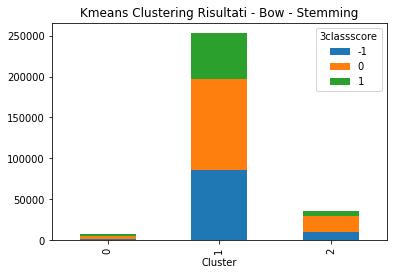

In [41]:
df_confusion_bow_stem.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Bow - Stemming")
plt.legend(title='3classscore')
plt.show()

In [42]:
#Valutazione clustering Bag Of Words - Stemming
v_measure_score_bow_stem = v_measure_score(Score_bow_stem, Cluster_bow_stem)
print(v_measure_score(Score_bow_stem, Cluster_bow_stem))
normalized_mutual_info_score_bow_stem = normalized_mutual_info_score(Score_bow_stem, Cluster_bow_stem)
print(normalized_mutual_info_score(Score_bow_stem, Cluster_bow_stem))
fowlkes_mallows_score_bow_stem = fowlkes_mallows_score(Score_bow_stem, Cluster_bow_stem)
print(fowlkes_mallows_score(Score_bow_stem, Cluster_bow_stem))

0.0035876745650419866
0.0035876745650419866
0.5137926963065429


In [46]:
#confusion_matrix_bow_stem = confusion_matrix(Cluster_bow_stem, Score_bow_stem)
#confusion_matrix_bow_stem
clusters_bow_stem.head()

Text_stem_str  Cluster_bow_stem
0  ['note', 'review', 'specif', 'cat', 'food', 's...                 2
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...                 1
2  ['buyer', 'bewar', 'read', 'complet', 'get', '...                 1
3  ['took', 'one', 'bite', 'found', 'cracker', 'i...                 1
4  ['awar', 'imag', 'shown', 'true', 'product', '...                 1

In [49]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 0, "Text_stem_str"].tolist() 
text_perwordcloud_c1 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 1, "Text_stem_str"].tolist() 
text_perwordcloud_c2 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 2, "Text_stem_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)

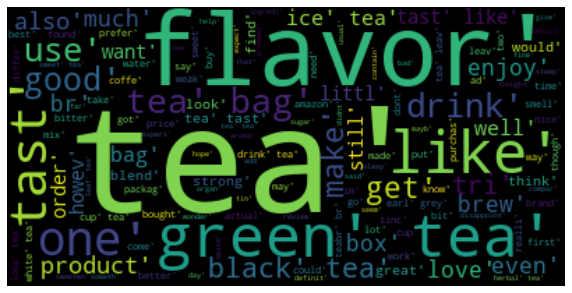

In [50]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

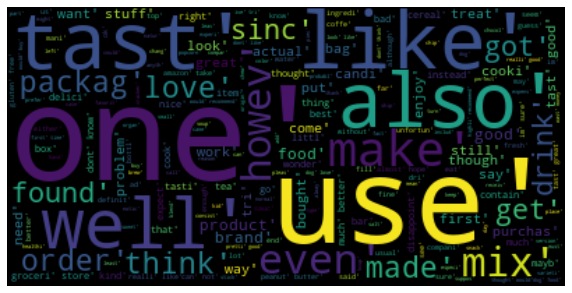

In [51]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

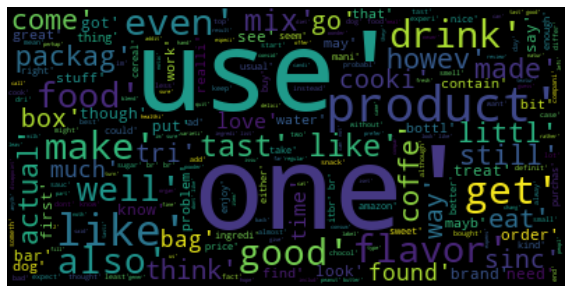

In [52]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

## KMeans - Tfid - Stemming

In [53]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=3
model_tfid_stem = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_tfid_stem.fit(X_tfid_stem)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [54]:
labels_tfid_stem = model_tfid_stem.labels_
clusters_tfid_stem = pd.DataFrame(list(zip(text_stem_str,labels_tfid_stem)),columns=['Text_stem_str','Cluster_tfid_stem'])
print(clusters_tfid_stem.sort_values(by=['Cluster_tfid_stem']))

                                            Text_stem_str  Cluster_tfid_stem
113482  ['good', 'coffe', 'blend', 'quit', 'strong', '...                  0
140228  ['bare', 'stand', 'smell', 'coffe', 'let', 'al...                  0
105803  ['coffe', 'smooth', 'great', 'flavor', 'medium...                  0
57288   ['drink', 'lot', 'chai', 'tea', 'excit', 'tri'...                  0
39662   ['packagingbr', 'got', 'mail', 'sort', 'seal',...                  0
...                                                   ...                ...
62044   ['love', 'make', 'pad', 'thai', 'home', 'quit'...                  2
62040   ['golden', 'pick', 'bottl', 'dump', 'everyth',...                  2
62033   ['great', 'valu', 'infus', 'truffl', 'oil', 'h...                  2
62059   ['brown', 'piec', 'food', 'bizarr', 'almost', ...                  2
149999  ['im', 'sorri', 'didnt', 'say', 'sooner', 'lov...                  2

[150000 rows x 2 columns]


In [55]:
clusters_tfid_stem_daunire =clusters_tfid_stem.rename(columns={'Text_stem_str':'Text_stemming','Cluster_tfid_stem':'Cluster'})
clusters_tfid_stem_daunire.head(2)

Text_stemming  Cluster
0  ['note', 'review', 'specif', 'cat', 'food', 's...        2
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        1

In [56]:
unione_tfid_stemdaunire = pd.merge(amazon1,clusters_tfid_stem_daunire, on="Text_stemming")
unione_tfid_stemdaunire.head()

3classscore                                      Text_stemming  Cluster
0           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
1           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
2           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
3           -1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
4           -1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        1

In [57]:
finale_tfid_stem = unione_tfid_stemdaunire[['3classscore','Cluster']]
Score_tfid_stem = finale_tfid_stem ['3classscore']
Cluster_tfid_stem = finale_tfid_stem['Cluster']
finale_tfid_stem.head()

3classscore  Cluster
0           -1        2
1           -1        2
2           -1        2
3           -1        2
4           -1        1

In [58]:
df_confusion_tfid_stem = pd.crosstab(Cluster_tfid_stem, Score_tfid_stem)
df_confusion_tfid_stem

3classscore     -1      0      1
Cluster                         
0            11976  19803   9651
1            30811  51047  19842
2            55209  63642  34107

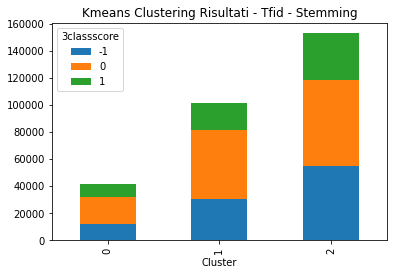

In [59]:
df_confusion_tfid_stem.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Tfid - Stemming")
plt.legend(title='3classscore')
plt.show()

In [60]:
#Valutazione clustering Tfid - Stemming
v_measure_score_tfid_stem = v_measure_score(Score_tfid_stem, Cluster_tfid_stem)
print(v_measure_score(Score_tfid_stem, Cluster_tfid_stem))
normalized_mutual_info_score_tfid_stem = normalized_mutual_info_score(Score_tfid_stem, Cluster_tfid_stem)
print(normalized_mutual_info_score(Score_tfid_stem, Cluster_tfid_stem))
fowlkes_mallows_score_tfid_stem = fowlkes_mallows_score(Score_tfid_stem, Cluster_tfid_stem)
print(fowlkes_mallows_score(Score_tfid_stem, Cluster_tfid_stem))

0.00369069697766722
0.0036906969776672204
0.3827463604215587


In [61]:
clusters_tfid_stem.head()

Text_stem_str  Cluster_tfid_stem
0  ['note', 'review', 'specif', 'cat', 'food', 's...                  2
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...                  1
2  ['buyer', 'bewar', 'read', 'complet', 'get', '...                  2
3  ['took', 'one', 'bite', 'found', 'cracker', 'i...                  1
4  ['awar', 'imag', 'shown', 'true', 'product', '...                  0

In [62]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 0, "Text_stem_str"].tolist() 
text_perwordcloud_c1 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 1, "Text_stem_str"].tolist() 
text_perwordcloud_c2 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 2, "Text_stem_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)

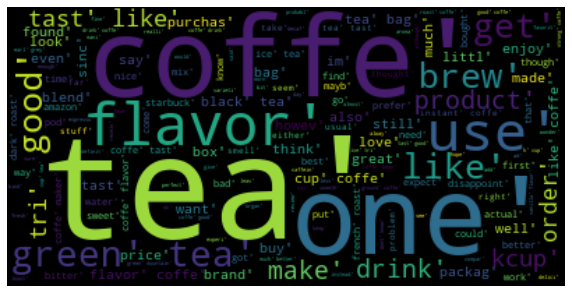

In [63]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

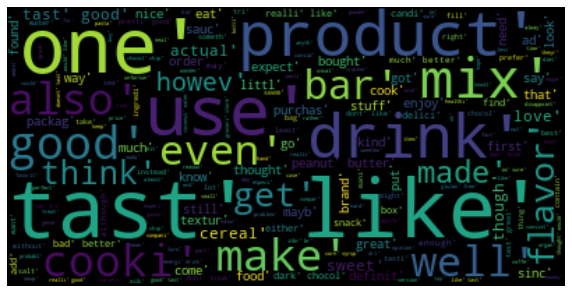

In [64]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

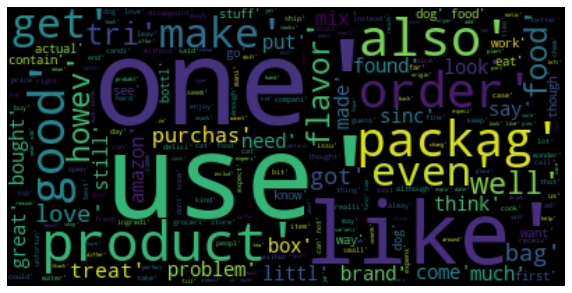

In [65]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

# Bag of words - Machine Learning - STEMMED

In [197]:
x = text_bagofwords_stemmed
y = amazon['3classscore']

In [198]:
#DIMENSIONALITY REDUCTON
#number of components 300
svd = TruncatedSVD(n_components=400, n_iter=100)
x = svd.fit_transform(x)
print(sum(svd.explained_variance_ratio_ ))

0.8337674710914514


In [205]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_bow_stemmed = accuracy_score(Y_test, y_pred)
accuracy_adaboost_bow_stemmed = round(accuracy_adaboost_bow_stemmed, 3)
print("Accuracy: ", accuracy_adaboost_bow_stemmed)
print(classification_report(Y_test, y_pred))

Accuracy:  0.512
              precision    recall  f1-score   support

          -1       0.52      0.57      0.55     15000
           0       0.45      0.36      0.40     15000
           1       0.54      0.60      0.57     15000

    accuracy                           0.51     45000
   macro avg       0.51      0.51      0.51     45000
weighted avg       0.51      0.51      0.51     45000



In [206]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_bow_stemmed = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_bow_stemmed = round(accuracy_decisiontree_bow_stemmed, 3)
print("Accuracy: ", accuracy_decisiontree_bow_stemmed)
print(classification_report(Y_test, y_pred))

Accuracy:  0.684
              precision    recall  f1-score   support

          -1       0.68      0.69      0.69     15000
           0       0.69      0.79      0.74     15000
           1       0.67      0.57      0.62     15000

    accuracy                           0.68     45000
   macro avg       0.68      0.68      0.68     45000
weighted avg       0.68      0.68      0.68     45000



In [207]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_bow_stemmed = accuracy_score(Y_test, y_pred)
accuracy_randomforest_bow_stemmed = round(accuracy_randomforest_bow_stemmed, 3)
print("Accuracy: ", accuracy_randomforest_bow_stemmed)
print(classification_report(Y_test, y_pred))

Accuracy:  0.77
              precision    recall  f1-score   support

          -1       0.76      0.78      0.77     15000
           0       0.83      0.76      0.80     15000
           1       0.73      0.77      0.75     15000

    accuracy                           0.77     45000
   macro avg       0.77      0.77      0.77     45000
weighted avg       0.77      0.77      0.77     45000



In [208]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_bow_stemmed = accuracy_score(Y_test, prediction)
accuracy_logreg_bow_stemmed = round(accuracy_logreg_bow_stemmed, 3)
print("Accuracy: ", accuracy_logreg_bow_stemmed)
print(classification_report(Y_test,prediction)) 

Accuracy:  0.611
              precision    recall  f1-score   support

          -1       0.62      0.68      0.65     15000
           0       0.56      0.44      0.49     15000
           1       0.64      0.72      0.68     15000

    accuracy                           0.61     45000
   macro avg       0.61      0.61      0.60     45000
weighted avg       0.61      0.61      0.60     45000



In [209]:
#KNN 
#computational time = 15:51
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_bow_stemmed = accuracy_score(Y_test, prediction)
accuracy_knn_bow_stemmed = round(accuracy_knn_bow_stemmed, 3)
print("Accuracy: ", accuracy_knn_bow_stemmed)
print(classification_report(Y_test, prediction))

Accuracy:  0.548
              precision    recall  f1-score   support

          -1       0.51      0.65      0.57     15000
           0       0.55      0.51      0.53     15000
           1       0.60      0.49      0.54     15000

    accuracy                           0.55     45000
   macro avg       0.55      0.55      0.55     45000
weighted avg       0.55      0.55      0.55     45000



In [210]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_bow_stemmed = accuracy_score(Y_test, prediction)
accuracy_naive_bow_stemmed = round(accuracy_naive_bow_stemmed, 3)
print("Accuracy: ", accuracy_naive_bow_stemmed)
print(classification_report(Y_test, prediction))

Accuracy:  0.437
              precision    recall  f1-score   support

          -1       0.57      0.27      0.37     15000
           0       0.40      0.32      0.36     15000
           1       0.42      0.72      0.53     15000

    accuracy                           0.44     45000
   macro avg       0.46      0.44      0.42     45000
weighted avg       0.46      0.44      0.42     45000



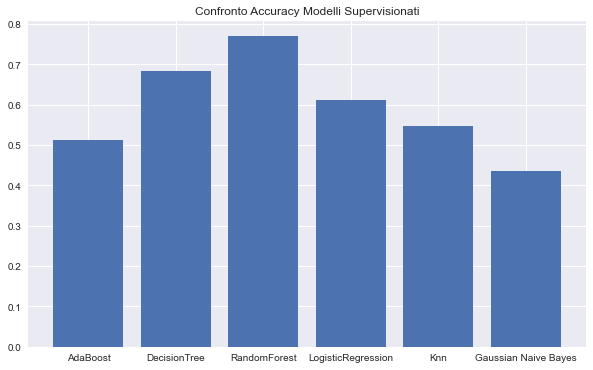

In [226]:
#Confronto Accuracy dei vari modelli appena illustrati:
#Make a random dataset:
valori_accuracy_bow_stemmed = [accuracy_adaboost_bow_stemmed, accuracy_decisiontree_bow_stemmed, accuracy_randomforest_bow_stemmed, accuracy_logreg_bow_stemmed, accuracy_knn_bow_stemmed, accuracy_naive_bow_stemmed]
bars_accuracy_bow_stemmed = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_bow_stemmed = np.arange(len(bars_accuracy_bow_stemmed))
#Create bars
plt.bar(y_pos_accuracy_bow_stemmed, valori_accuracy_bow_stemmed)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_bow_stemmed, bars_accuracy_bow_stemmed)
#Show graphic
plt.title("Confronto Accuracy Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# TD-IDF - Machine Learning - STEMMED

In [227]:
x1 = text_tdidf_stemmed
y1 = amazon['3classscore']

In [228]:
#SET UP OF 300
svd = TruncatedSVD (n_components=400, n_iter=100)
x1 = svd.fit_transform (x1)
print(sum(svd.explained_variance_ratio_ ))

0.42543672719465986


In [229]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_tfid_stemmed = accuracy_score(Y_test, y_pred)
accuracy_adaboost_tfid_stemmed = round(accuracy_adaboost_tfid_stemmed, 3)
print("Accuracy: ", accuracy_adaboost_tfid_stemmed)
print(classification_report (Y_test, y_pred))

Accuracy:  0.531
              precision    recall  f1-score   support

          -1       0.55      0.58      0.56     15000
           0       0.47      0.39      0.43     15000
           1       0.57      0.62      0.59     15000

    accuracy                           0.53     45000
   macro avg       0.53      0.53      0.53     45000
weighted avg       0.53      0.53      0.53     45000



In [230]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_tfid_stemmed = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_tfid_stemmed = round(accuracy_decisiontree_tfid_stemmed, 3)
print("Accuracy: ", accuracy_decisiontree_tfid_stemmed)
print(classification_report (Y_test, y_pred))

Accuracy:  0.696
              precision    recall  f1-score   support

          -1       0.70      0.70      0.70     15000
           0       0.70      0.79      0.75     15000
           1       0.69      0.59      0.64     15000

    accuracy                           0.70     45000
   macro avg       0.70      0.70      0.69     45000
weighted avg       0.70      0.70      0.69     45000



In [231]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_tfid_stemmed = accuracy_score(Y_test, y_pred)
accuracy_randomforest_tfid_stemmed = round(accuracy_randomforest_tfid_stemmed, 3)
print("Accuracy: ", accuracy_randomforest_tfid_stemmed)
print(classification_report (Y_test, y_pred))

Accuracy:  0.784
              precision    recall  f1-score   support

          -1       0.77      0.80      0.79     15000
           0       0.87      0.75      0.81     15000
           1       0.73      0.79      0.76     15000

    accuracy                           0.78     45000
   macro avg       0.79      0.78      0.79     45000
weighted avg       0.79      0.78      0.79     45000



In [232]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_tfid_stemmed = accuracy_score(Y_test, prediction)
accuracy_logreg_tfid_stemmed = round(accuracy_logreg_tfid_stemmed, 3)
print("Accuracy: ", accuracy_logreg_tfid_stemmed)
print(classification_report(Y_test, prediction)) 

Accuracy:  0.632
              precision    recall  f1-score   support

          -1       0.64      0.69      0.66     15000
           0       0.56      0.49      0.52     15000
           1       0.67      0.72      0.70     15000

    accuracy                           0.63     45000
   macro avg       0.63      0.63      0.63     45000
weighted avg       0.63      0.63      0.63     45000



In [233]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_tfid_stemmed = accuracy_score(Y_test, prediction)
accuracy_knn_tfid_stemmed = round(accuracy_knn_tfid_stemmed, 3)
print("Accuracy: ", accuracy_knn_tfid_stemmed)
print(classification_report(Y_test, prediction))

Accuracy:  0.533
              precision    recall  f1-score   support

          -1       0.49      0.68      0.57     15000
           0       0.53      0.52      0.53     15000
           1       0.61      0.39      0.48     15000

    accuracy                           0.53     45000
   macro avg       0.55      0.53      0.53     45000
weighted avg       0.55      0.53      0.53     45000



In [234]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_tfid_stemmed = accuracy_score(Y_test, prediction)
accuracy_naive_tfid_stemmed = round(accuracy_naive_tfid_stemmed, 3)
print("Accuracy: ", accuracy_naive_tfid_stemmed)
print(classification_report(Y_test, prediction))

Accuracy:  0.5
              precision    recall  f1-score   support

          -1       0.47      0.61      0.53     15000
           0       0.46      0.40      0.43     15000
           1       0.58      0.49      0.53     15000

    accuracy                           0.50     45000
   macro avg       0.51      0.50      0.50     45000
weighted avg       0.51      0.50      0.50     45000



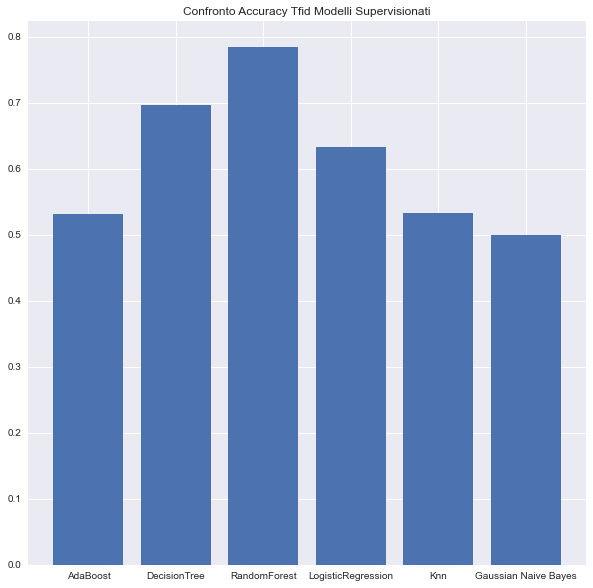

In [237]:
#Confronto Accuracy dei vari modelli appena illustrati:
#Make a random dataset:
valori_accuracy_tfid_stemmed = [accuracy_adaboost_tfid_stemmed, accuracy_decisiontree_tfid_stemmed, accuracy_randomforest_tfid_stemmed, accuracy_logreg_tfid_stemmed, accuracy_knn_tfid_stemmed, accuracy_naive_tfid_stemmed]
bars_accuracy_tfid_stemmed = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_tfid_stemmed = np.arange(len(bars_accuracy_tfid_stemmed))
#Create bars
plt.bar(y_pos_accuracy_tfid_stemmed, valori_accuracy_tfid_stemmed)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_tfid_stemmed, bars_accuracy_tfid_stemmed)
#Show graphic
plt.title("Confronto Accuracy Tfid Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# TEXT REPRESENTATION AND CLASSIFICATION FOR LEMMATIZED TEXT
We represent the text in two different ways: Bag of Words and TD-IDF. 
Cause the computational diffculty to perfomr the algorthms we decide to apply a dimensionl reduction of maximum 300 features.  

## BAG OF WORDS - LEMMED

In [66]:
amazon['Text_lemmatization'] = amazon['Text_lemmatization'].apply(str)
text = amazon['Text_lemmatization']

In [67]:
#SET UP DI 1000 FEATURE
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_lemma =  vectorizer.fit_transform(text)

In [68]:
print(text_bagofwords_lemma.shape)
#print(text_bagofwords_lemma)


  (0, 576)	1
  (0, 729)	1
  (0, 140)	8
  (0, 333)	14
  (0, 805)	1
  (0, 618)	1
  (0, 691)	3
  (0, 104)	11
  (0, 299)	1
  (0, 648)	1
  (0, 392)	3
  (0, 444)	1
  (0, 266)	3
  (0, 577)	2
  (0, 282)	4
  (0, 968)	2
  (0, 580)	1
  (0, 241)	3
  (0, 579)	1
  (0, 204)	1
  (0, 479)	1
  (0, 38)	11
  (0, 606)	1
  (0, 470)	2
  (0, 735)	1
  :	:
  (149999, 381)	1
  (149999, 740)	1
  (149999, 750)	1
  (149999, 509)	1
  (149999, 238)	1
  (149999, 255)	1
  (149999, 370)	1
  (149999, 712)	1
  (149999, 174)	1
  (149999, 508)	1
  (149999, 221)	1
  (149999, 924)	1
  (149999, 885)	1
  (149999, 934)	2
  (149999, 420)	1
  (149999, 518)	1
  (149999, 356)	1
  (149999, 179)	1
  (149999, 942)	1
  (149999, 772)	1
  (149999, 927)	1
  (149999, 668)	1
  (149999, 812)	1
  (149999, 460)	1
  (149999, 488)	1
(150000, 1000)


## TD -  IDF - LEMMED

In [69]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_lemma = vectorizer.fit_transform(text)

In [70]:
print(text_tdidf_lemma.shape)
#print(text_tdidf_lemma)

(150000, 15000)
  (0, 6308)	0.04372821085611712
  (0, 10141)	0.036946810026470114
  (0, 967)	0.04071702985311155
  (0, 11277)	0.037698018214098766
  (0, 8229)	0.022644665007815527
  (0, 5279)	0.02430769016228533
  (0, 14838)	0.014141708055843069
  (0, 10470)	0.05179946488504858
  (0, 8231)	0.0233552562325027
  (0, 9526)	0.037891872120094636
  (0, 9331)	0.021124308350170647
  (0, 3630)	0.03658030441337705
  (0, 10831)	0.02220879364414847
  (0, 8262)	0.04700451872522943
  (0, 11066)	0.040307544478019416
  (0, 10802)	0.03308472515517147
  (0, 1040)	0.034412588087728166
  (0, 7091)	0.05501084817505821
  (0, 9289)	0.026626694906499923
  (0, 11043)	0.04581614466257189
  (0, 1176)	0.03497710110230761
  (0, 7175)	0.019318162950231563
  (0, 14901)	0.023773940088204434
  (0, 108)	0.030099694970740228
  (0, 5595)	0.043642771805960476
  :	:
  (149999, 14285)	0.19243150841259654
  (149999, 3003)	0.14514665393638262
  (149999, 5841)	0.16714035236303665
  (149999, 8048)	0.19203410573228655
  (149999,

# Clustering - KMeans - LEMMATIZATION

In [71]:
amazon['Text_lemmatization_str'] = amazon['Text_lemmatization'].apply(str)
text_lemma_str = amazon['Text_lemmatization_str']

In [72]:
vectorizer_bow_lemma = CountVectorizer(max_features = 15000)
X_bow_lemma =  vectorizer_bow_lemma.fit_transform(text_lemma_str)

In [73]:
vectorizer_tfid_lemma = TfidfVectorizer(stop_words={'english'})
X_tfid_lemma = vectorizer_tfid_lemma.fit_transform(text_lemma_str)

## KMeans - Bow - Lemmatization

In [74]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=3
model_bow_lemma = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_bow_lemma.fit(X_bow_lemma)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [75]:
labels_bow_lemma = model_bow_lemma.labels_
clusters_bow_lemma = pd.DataFrame(list(zip(text_lemma_str,labels_bow_lemma)),columns=['Text_lemma_str','Cluster_bow_lemma'])
print(clusters_bow_lemma.sort_values(by=['Cluster_bow_lemma']))

                                           Text_lemma_str  Cluster_bow_lemma
0       ['note', 'review', 'specifically', 'cat', 'foo...                  0
40200   ['love', 'peanut', 'butter', 'anything', 'pean...                  0
112317  ['eternal', 'dieters', 'quest', 'replacement',...                  0
112327  ['dog', 'dog', 'loves', 'food', 'learned', 'op...                  0
112333  ['hard', 'say', 'like', 'crunchy', 'nut', 'cer...                  0
...                                                   ...                ...
106211  ['hey', 'teanothing', 'amazing', 'reliable', '...                  2
93875   ['really', 'nice', 'tea', 'love', 'beautiful',...                  2
141720  ['ive', 'always', 'heard', 'many', 'benefits',...                  2
64477   ['nice', 'youre', 'traditionalist', 'quite', '...                  2
105016  ['kids', 'enjoy', 'flavor', 'blackberry', 'pom...                  2

[150000 rows x 2 columns]


In [76]:
amazon1_lemma = amazon[['3classscore','Text_lemmatization_str']]
amazon1_lemma.head(2)

3classscore                             Text_lemmatization_str
212969           -1  ['note', 'review', 'specifically', 'cat', 'foo...
9648             -1  ['well', 'bought', 'food', 'tripping', 'party'...

In [77]:
clusters_bow_lemma_daunire =clusters_bow_lemma.rename(columns={'Text_lemma_str':'Text_lemmatization_str','Cluster_bow_lemma':'Cluster'})
clusters_bow_lemma_daunire.head(2)

Text_lemmatization_str  Cluster
0  ['note', 'review', 'specifically', 'cat', 'foo...        0
1  ['well', 'bought', 'food', 'tripping', 'party'...        1

In [78]:
unione_bow_lemmadaunire = pd.merge(amazon1_lemma,clusters_bow_lemma_daunire, on="Text_lemmatization_str")
unione_bow_lemmadaunire.head()

3classscore                             Text_lemmatization_str  Cluster
0           -1  ['note', 'review', 'specifically', 'cat', 'foo...        0
1           -1  ['note', 'review', 'specifically', 'cat', 'foo...        0
2           -1  ['note', 'review', 'specifically', 'cat', 'foo...        0
3           -1  ['note', 'review', 'specifically', 'cat', 'foo...        0
4           -1  ['well', 'bought', 'food', 'tripping', 'party'...        1

In [79]:
finale_bow_lemma = unione_bow_lemmadaunire[['3classscore','Cluster']]
Score_bow_lemma = finale_bow_lemma['3classscore']
Cluster_bow_lemma = finale_bow_lemma['Cluster']
finale_bow_lemma.head()

3classscore  Cluster
0           -1        0
1           -1        0
2           -1        0
3           -1        0
4           -1        1

In [80]:
df_confusion_bow_lemma = pd.crosstab(Cluster_bow_lemma, Score_bow_lemma)
df_confusion_bow_lemma

3classscore     -1       0      1
Cluster                          
0             8996   18465   5934
1            86782  112158  56009
2             2218    3864   1654

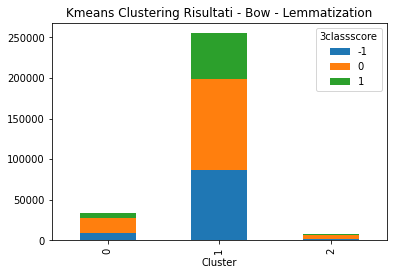

In [81]:
df_confusion_bow_lemma.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Bow - Lemmatization")
plt.legend(title='3classscore')
plt.show()

In [82]:
#Valutazione clustering Bag Of Words - Lemmatization
v_measure_score_bow_lemma = v_measure_score(Score_bow_lemma, Cluster_bow_lemma)
print(v_measure_score(Score_bow_lemma, Cluster_bow_lemma))
normalized_mutual_info_score_bow_lemma = normalized_mutual_info_score(Score_bow_lemma, Cluster_bow_lemma)
print(normalized_mutual_info_score(Score_bow_lemma, Cluster_bow_lemma))
fowlkes_mallows_score_bow_lemma = fowlkes_mallows_score(Score_bow_lemma, Cluster_bow_lemma)
print(fowlkes_mallows_score(Score_bow_lemma, Cluster_bow_lemma))

0.003542800866898459
0.0035428008668984597
0.5177670726251413


In [83]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 0, "Text_lemma_str"].tolist() 
text_perwordcloud_c1 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 1, "Text_lemma_str"].tolist() 
text_perwordcloud_c2 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 2, "Text_lemma_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)

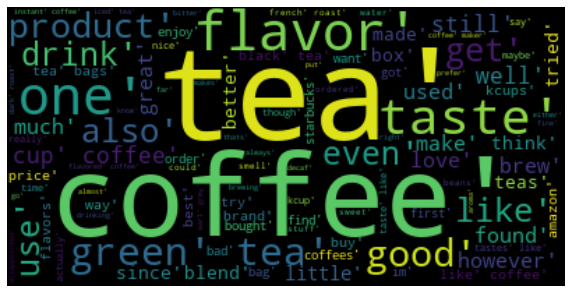

In [84]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

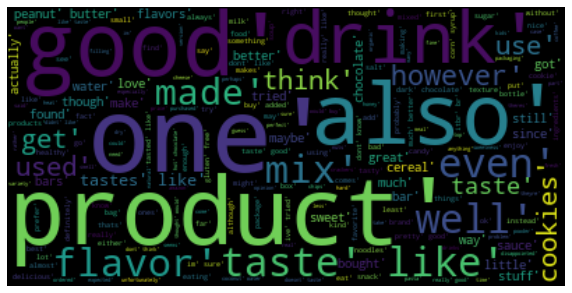

In [85]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

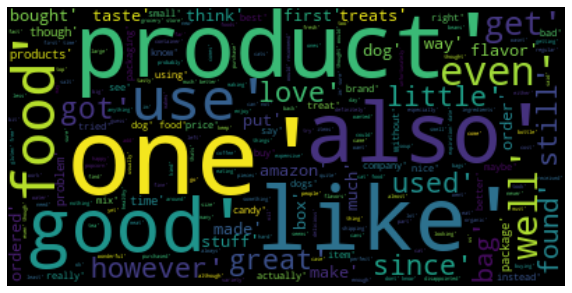

In [86]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

## KMeans - Tfid - Lemmatization

In [87]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=3
model_tfid_lemma = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_tfid_lemma.fit(X_tfid_lemma)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [88]:
labels_tfid_lemma = model_tfid_lemma.labels_
clusters_tfid_lemma = pd.DataFrame(list(zip(text_lemma_str,labels_tfid_lemma)),columns=['Text_lemma_str','Cluster_tfid_lemma'])
print(clusters_tfid_lemma.sort_values(by=['Cluster_tfid_lemma']))

                                           Text_lemma_str  Cluster_tfid_lemma
74999   ['tad', 'sweet', 'taste', 'also', 'bit', 'squi...                   0
93636   ['really', 'didnt', 'know', 'expect', 'product...                   0
93635   ['thrilled', 'find', 'new', 'gluten', 'free', ...                   0
93634   ['really', 'tasty', 'first', 'got', 'opened', ...                   0
93633   ['bag', 'told', 'much', 'powder', 'use', 'much...                   0
...                                                   ...                 ...
120771  ['vet', 'recommended', 'wonder', 'dog', 'loves...                   2
71369   ['used', 'cube', 'couple', 'times', 'works', '...                   2
90855   ['bought', 'way', 'get', 'foodmotivated', 'kit...                   2
51169   ['primary', 'complaint', 'chews', 'supposed', ...                   2
0       ['note', 'review', 'specifically', 'cat', 'foo...                   2

[150000 rows x 2 columns]


In [89]:
amazon1_lemma = amazon[['3classscore','Text_lemmatization_str']]
amazon1_lemma.head(2)

3classscore                             Text_lemmatization_str
212969           -1  ['note', 'review', 'specifically', 'cat', 'foo...
9648             -1  ['well', 'bought', 'food', 'tripping', 'party'...

In [90]:
clusters_tfid_lemma_daunire =clusters_tfid_lemma.rename(columns={'Text_lemma_str':'Text_lemmatization_str','Cluster_tfid_lemma':'Cluster'})
clusters_tfid_lemma_daunire.head(2)

Text_lemmatization_str  Cluster
0  ['note', 'review', 'specifically', 'cat', 'foo...        2
1  ['well', 'bought', 'food', 'tripping', 'party'...        0

In [91]:
unione_tfid_lemmadaunire = pd.merge(amazon1_lemma ,clusters_tfid_lemma_daunire, on="Text_lemmatization_str")
unione_tfid_lemmadaunire.head()

3classscore                             Text_lemmatization_str  Cluster
0           -1  ['note', 'review', 'specifically', 'cat', 'foo...        2
1           -1  ['note', 'review', 'specifically', 'cat', 'foo...        2
2           -1  ['note', 'review', 'specifically', 'cat', 'foo...        2
3           -1  ['note', 'review', 'specifically', 'cat', 'foo...        2
4           -1  ['well', 'bought', 'food', 'tripping', 'party'...        0

In [92]:
finale_tfid_lemma = unione_tfid_lemmadaunire[['3classscore','Cluster']]
Score_tfid_lemma = finale_tfid_lemma['3classscore']
Cluster_tfid_lemma = finale_tfid_lemma['Cluster']
finale_tfid_lemma.head()

3classscore  Cluster
0           -1        2
1           -1        2
2           -1        2
3           -1        2
4           -1        0

In [93]:
df_confusion_tfid_lemma = pd.crosstab(Cluster_tfid_lemma, Score_tfid_lemma)
df_confusion_tfid_lemma

3classscore     -1       0      1
Cluster                          
0            78480  103878  49097
1            12322   20554   9649
2             7194   10055   4851

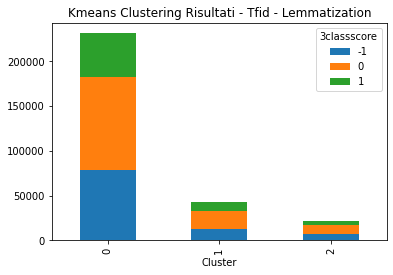

In [94]:
df_confusion_tfid_lemma.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Tfid - Lemmatization")
plt.legend(title='3classscore')
plt.show()

In [95]:
#Valutazione clustering Tfid - Stemming
v_measure_score_tfid_lemma = v_measure_score(Score_tfid_lemma, Cluster_tfid_lemma)
print(v_measure_score(Score_tfid_lemma, Cluster_tfid_lemma))
normalized_mutual_info_score_tfid_lemma = normalized_mutual_info_score(Score_tfid_lemma, Cluster_tfid_lemma)
print(normalized_mutual_info_score(Score_tfid_lemma, Cluster_tfid_lemma))
fowlkes_mallows_score_tfid_lemma = fowlkes_mallows_score(Score_tfid_lemma, Cluster_tfid_lemma)
print(fowlkes_mallows_score(Score_tfid_lemma, Cluster_tfid_lemma))

0.0007986812287483373
0.0007986812287483373
0.4798294022770165


In [96]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_tfid_lemma.loc[clusters_tfid_lemma["Cluster_tfid_lemma"] == 0, "Text_lemma_str"].tolist() 
text_perwordcloud_c1 = clusters_tfid_lemma.loc[clusters_tfid_lemma['Cluster_tfid_lemma'] == 1, "Text_lemma_str"].tolist() 
text_perwordcloud_c2 = clusters_tfid_lemma.loc[clusters_tfid_lemma['Cluster_tfid_lemma'] == 2, "Text_lemma_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)

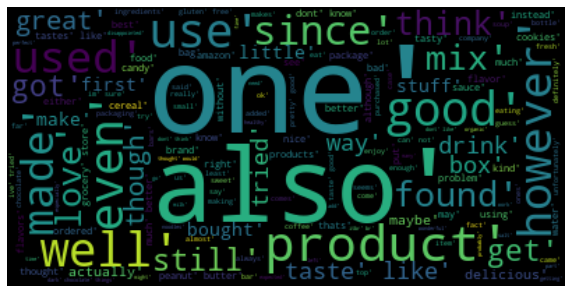

In [97]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

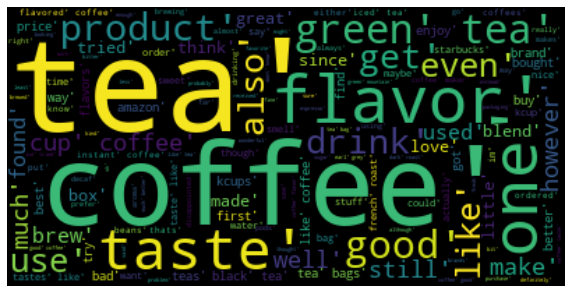

In [98]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

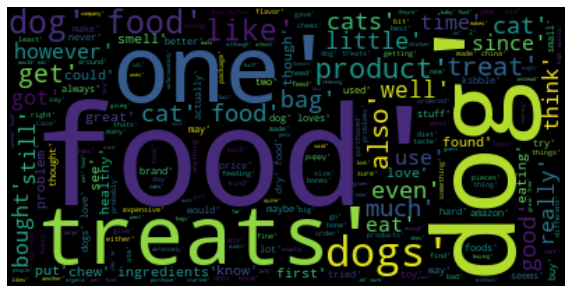

In [99]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

## Bag of words - Machine Learning - Lemmed 

In [38]:
x = text_bagofwords_lemma
y = amazon['3classscore']

In [39]:
#DIMENSIONALITY REDUCTON
#number of components 300
svd = TruncatedSVD (n_components=300, n_iter=100)
x = svd.fit_transform (x)
print(sum(svd.explained_variance_ratio_ ))

0.7474967393774504


In [40]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_bow_lemma = accuracy_score(Y_test, y_pred)
accuracy_adaboost_bow_lemma = round(accuracy_adaboost_bow_lemma, 3)
print("Accuracy: ", accuracy_adaboost_bow_lemma)
print(classification_report(Y_test, y_pred))

Accuracy:  0.507
              precision    recall  f1-score   support

          -1       0.52      0.58      0.54     15000
           0       0.46      0.36      0.41     15000
           1       0.53      0.58      0.56     15000

    accuracy                           0.51     45000
   macro avg       0.50      0.51      0.50     45000
weighted avg       0.50      0.51      0.50     45000



In [41]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_bow_lemma = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_bow_lemma = round(accuracy_decisiontree_bow_lemma, 3)
print("Accuracy: ", accuracy_decisiontree_bow_lemma)
print(classification_report(Y_test, y_pred))

Accuracy:  0.682
              precision    recall  f1-score   support

          -1       0.68      0.69      0.69     15000
           0       0.69      0.79      0.74     15000
           1       0.66      0.57      0.61     15000

    accuracy                           0.68     45000
   macro avg       0.68      0.68      0.68     45000
weighted avg       0.68      0.68      0.68     45000



In [42]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_bow_lemma = accuracy_score(Y_test, y_pred)
accuracy_randomforest_bow_lemma = round(accuracy_randomforest_bow_lemma, 3)
print("Accuracy: ", accuracy_randomforest_bow_lemma)
print(classification_report(Y_test, y_pred))

Accuracy:  0.771
              precision    recall  f1-score   support

          -1       0.76      0.78      0.77     15000
           0       0.84      0.76      0.80     15000
           1       0.73      0.77      0.75     15000

    accuracy                           0.77     45000
   macro avg       0.77      0.77      0.77     45000
weighted avg       0.77      0.77      0.77     45000



In [43]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_bow_lemma = accuracy_score(Y_test, prediction)
accuracy_logreg_bow_lemma = round(accuracy_logreg_bow_lemma, 3)
print("Accuracy: ", accuracy_logreg_bow_lemma)
print(classification_report(Y_test, prediction)) 

Accuracy:  0.598
              precision    recall  f1-score   support

          -1       0.60      0.67      0.63     15000
           0       0.56      0.43      0.48     15000
           1       0.62      0.70      0.66     15000

    accuracy                           0.60     45000
   macro avg       0.59      0.60      0.59     45000
weighted avg       0.59      0.60      0.59     45000



In [44]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_bow_lemma = accuracy_score(Y_test, prediction)
accuracy_knn_bow_lemma = round(accuracy_knn_bow_lemma, 3)
print("Accuracy: ", accuracy_knn_bow_lemma)
print(classification_report(Y_test, prediction))

Accuracy:  0.541
              precision    recall  f1-score   support

          -1       0.51      0.64      0.57     15000
           0       0.55      0.51      0.53     15000
           1       0.58      0.47      0.52     15000

    accuracy                           0.54     45000
   macro avg       0.55      0.54      0.54     45000
weighted avg       0.55      0.54      0.54     45000



In [45]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_bow_lemma = accuracy_score(Y_test, prediction)
accuracy_naive_bow_lemma = round(accuracy_naive_bow_lemma, 3)
print("Accuracy: ", accuracy_naive_bow_lemma)
print(classification_report(Y_test, prediction))

Accuracy:  0.429
              precision    recall  f1-score   support

          -1       0.55      0.25      0.35     15000
           0       0.41      0.32      0.36     15000
           1       0.41      0.71      0.52     15000

    accuracy                           0.43     45000
   macro avg       0.45      0.43      0.41     45000
weighted avg       0.45      0.43      0.41     45000



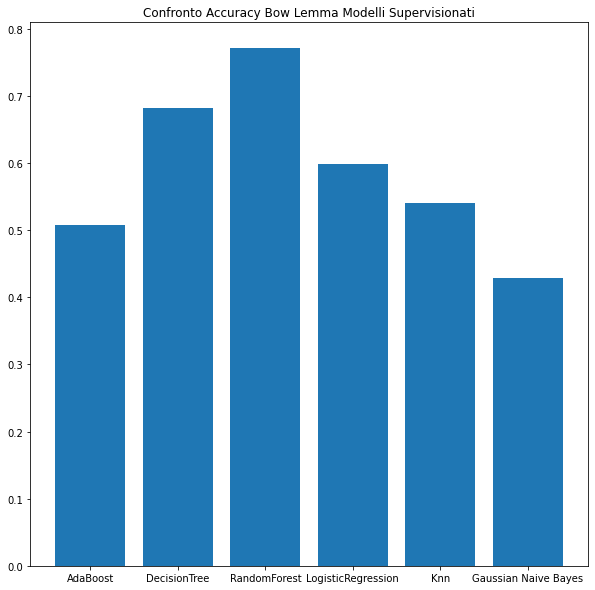

In [46]:
#Confronto Accuracy dei vari modelli appena illustrati:
valori_accuracy_bow_lemma = [accuracy_adaboost_bow_lemma, accuracy_decisiontree_bow_lemma, accuracy_randomforest_bow_lemma, accuracy_logreg_bow_lemma, accuracy_knn_bow_lemma, accuracy_naive_bow_lemma]
bars_accuracy_bow_lemma = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_bow_lemma = np.arange(len(bars_accuracy_bow_lemma))
#Create bars
plt.bar(y_pos_accuracy_bow_lemma, valori_accuracy_bow_lemma)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_bow_lemma, bars_accuracy_bow_lemma)
#Show graphic
plt.title("Confronto Accuracy Bow Lemma Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

## TD-IDF - Machine Learning - LEMMED

In [47]:
x1 = text_tdidf_lemma
y1 = amazon['3classscore']

In [48]:
#SET UP OF 400
svd = TruncatedSVD(n_components=400, n_iter=100)
x1 = svd.fit_transform (x1)
print(sum(svd.explained_variance_ratio_ ))

0.36427945627330105


In [49]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_tfid_lemma = accuracy_score(Y_test, y_pred)
accuracy_adaboost_tfid_lemma = round(accuracy_adaboost_tfid_lemma, 3)
print("Accuracy: ", accuracy_adaboost_tfid_lemma)
print(classification_report (Y_test, y_pred))

Accuracy:  0.542
              precision    recall  f1-score   support

          -1       0.56      0.61      0.58     15000
           0       0.48      0.40      0.43     15000
           1       0.58      0.62      0.60     15000

    accuracy                           0.54     45000
   macro avg       0.54      0.54      0.54     45000
weighted avg       0.54      0.54      0.54     45000



In [50]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_tfid_lemma = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_tfid_lemma = round(accuracy_decisiontree_tfid_lemma, 3)
print("Accuracy: ", accuracy_decisiontree_tfid_lemma)
print(classification_report(Y_test, y_pred))

Accuracy:  0.701
              precision    recall  f1-score   support

          -1       0.71      0.71      0.71     15000
           0       0.70      0.79      0.74     15000
           1       0.70      0.60      0.65     15000

    accuracy                           0.70     45000
   macro avg       0.70      0.70      0.70     45000
weighted avg       0.70      0.70      0.70     45000



In [51]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_tfid_lemma = accuracy_score(Y_test, prediction)
accuracy_naive_tfid_lemma = round(accuracy_naive_tfid_lemma, 3)
print("Accuracy: ", accuracy_naive_tfid_lemma)
print(classification_report(Y_test, prediction))

Accuracy:  0.493
              precision    recall  f1-score   support

          -1       0.46      0.60      0.52     15000
           0       0.46      0.42      0.44     15000
           1       0.60      0.46      0.52     15000

    accuracy                           0.49     45000
   macro avg       0.50      0.49      0.49     45000
weighted avg       0.50      0.49      0.49     45000



In [52]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_tfid_lemma = accuracy_score(Y_test, prediction)
accuracy_knn_tfid_lemma = round(accuracy_knn_tfid_lemma, 3)
print("Accuracy: ", accuracy_knn_tfid_lemma)
print(classification_report(Y_test, prediction))

Accuracy:  0.527
              precision    recall  f1-score   support

          -1       0.49      0.69      0.57     15000
           0       0.53      0.52      0.53     15000
           1       0.61      0.37      0.46     15000

    accuracy                           0.53     45000
   macro avg       0.54      0.53      0.52     45000
weighted avg       0.54      0.53      0.52     45000



In [53]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_tfid_lemma = accuracy_score(Y_test, y_pred)
accuracy_randomforest_tfid_lemma = round(accuracy_randomforest_tfid_lemma, 3)
print("Accuracy: ", accuracy_randomforest_tfid_lemma)
print(classification_report(Y_test, y_pred))

Accuracy:  0.787
              precision    recall  f1-score   support

          -1       0.78      0.80      0.79     15000
           0       0.86      0.76      0.81     15000
           1       0.74      0.81      0.77     15000

    accuracy                           0.79     45000
   macro avg       0.79      0.79      0.79     45000
weighted avg       0.79      0.79      0.79     45000



In [54]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_tfid_lemma = accuracy_score(Y_test, prediction)
accuracy_logreg_tfid_lemma = round(accuracy_logreg_tfid_lemma, 3)
print("Accuracy: ", accuracy_logreg_tfid_lemma)
print(classification_report(Y_test, prediction)) 

Accuracy:  0.634
              precision    recall  f1-score   support

          -1       0.64      0.69      0.67     15000
           0       0.57      0.49      0.53     15000
           1       0.68      0.72      0.70     15000

    accuracy                           0.63     45000
   macro avg       0.63      0.63      0.63     45000
weighted avg       0.63      0.63      0.63     45000



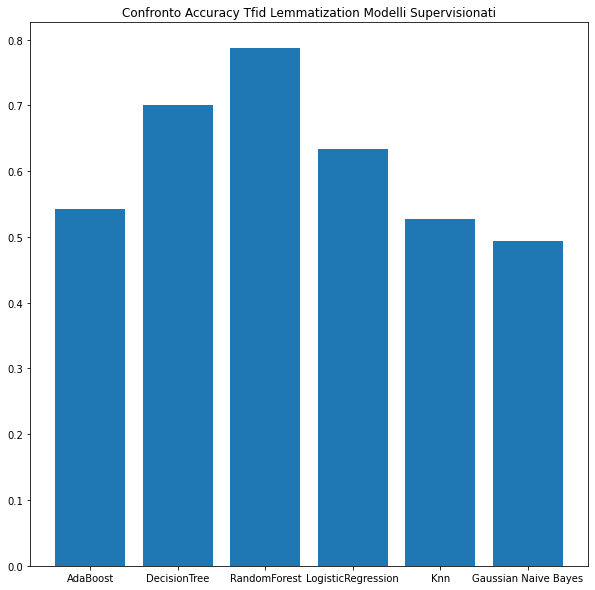

In [56]:
#Confronto Accuracy dei vari modelli appena illustrati:
valori_accuracy_tfid_lemma = [accuracy_adaboost_tfid_lemma, accuracy_decisiontree_tfid_lemma, accuracy_randomforest_tfid_lemma, accuracy_logreg_tfid_lemma, accuracy_knn_tfid_lemma, accuracy_naive_tfid_lemma]
bars_accuracy_tfid_lemma = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_tfid_lemma = np.arange(len(bars_accuracy_tfid_lemma))
#Create bars
plt.bar(y_pos_accuracy_tfid_lemma, valori_accuracy_tfid_lemma)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_tfid_lemma, bars_accuracy_tfid_lemma)
#Show graphic
plt.title("Confronto Accuracy Tfid Lemmatization Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# CONFRONTI VARI 

## CONFRONTI CLUSTERING tra le varie soluzione adottate

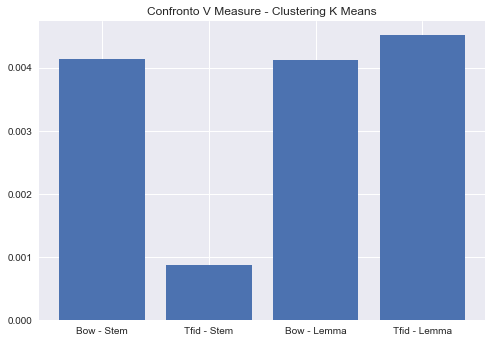

In [194]:
#Make a random dataset:
valori_clustering_vmeasure = [v_measure_score_bow_stem, v_measure_score_tfid_stem, v_measure_score_bow_lemma, v_measure_score_tfid_lemma]
bars_clustering_vmeasure = ('Bow - Stem', 'Tfid - Stem', 'Bow - Lemma', 'Tfid - Lemma')
y_pos_clustering_vmeasure = np.arange(len(bars_clustering_vmeasure))
#Create bars
plt.bar(y_pos_clustering_vmeasure, valori_clustering_vmeasure)
#Create names on the x-axis
plt.xticks(y_pos_clustering_vmeasure, bars_clustering_vmeasure)
#Show graphic
plt.title("Confronto V Measure - Clustering K Means")
plt.show()

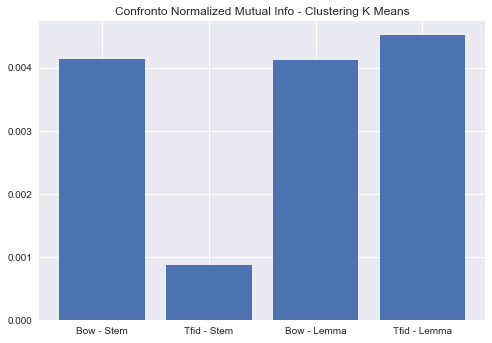

In [195]:
#Make a random dataset:
valori_clustering_normamutualinfo = [normalized_mutual_info_score_bow_stem, normalized_mutual_info_score_tfid_stem, normalized_mutual_info_score_bow_lemma, normalized_mutual_info_score_tfid_lemma]
bars_clustering_normamutualinfo = ('Bow - Stem', 'Tfid - Stem', 'Bow - Lemma', 'Tfid - Lemma')
y_pos_clustering_normamutualinfo = np.arange(len(bars_clustering_normamutualinfo))
#Create bars
plt.bar(y_pos_clustering_normamutualinfo, valori_clustering_normamutualinfo)
#Create names on the x-axis
plt.xticks(y_pos_clustering_normamutualinfo, bars_clustering_normamutualinfo)
#Show graphic
plt.title("Confronto Normalized Mutual Info - Clustering K Means")
plt.show()

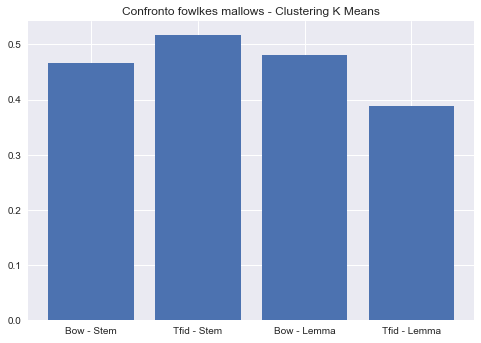

In [196]:
#Make a random dataset:
valori_clustering_fowlkesmallows = [fowlkes_mallows_score_bow_stem, fowlkes_mallows_score_tfid_stem, fowlkes_mallows_score_bow_lemma, fowlkes_mallows_score_tfid_lemma]
bars_clustering_fowlkesmallows = ('Bow - Stem', 'Tfid - Stem', 'Bow - Lemma', 'Tfid - Lemma')
y_pos_clustering_fowlkesmallows = np.arange(len(bars_clustering_fowlkesmallows))
#Create bars
plt.bar(y_pos_clustering_fowlkesmallows, valori_clustering_fowlkesmallows)
#Create names on the x-axis
plt.xticks(y_pos_clustering_fowlkesmallows, bars_clustering_fowlkesmallows)
#Show graphic
plt.title("Confronto fowlkes mallows - Clustering K Means")
plt.show()

# SENTIMENT ANALYSIS 
- rimozione URLS
- rimozione HTML tags
- white space removal 
- lemmatization

In [118]:
amazon_sent = pd.read_csv('/Users/matteo/Desktop/DATA SCIENCE/Text Mining and Search/ProgettoText/Reviewsprogettoamazon.csv')    

amazon_sent = amazon_sent.drop_duplicates(subset = {"UserId", "ProfileName","Time","Text"})

amazon_sent = amazon_sent.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'], axis = 1)

#BALANCING
#we have selected 30000 rows with a single score value and we concatenate the five varaibles to obtain an unique dataframe
fraud1_df = amazon_sent.loc[amazon_sent['Score'] == 1].sample(n=25000,random_state=42, replace = True)
fraud2_df = amazon_sent.loc[amazon_sent['Score'] == 2].sample(n=25000,random_state=42, replace = True)
fraud3_df = amazon_sent.loc[amazon_sent['Score'] == 3].sample(n=50000,random_state=42, replace = True)
fraud4_df = amazon_sent.loc[amazon_sent['Score'] == 4].sample(n=25000,random_state=42, replace = True)
fraud5_df = amazon_sent.loc[amazon_sent['Score'] == 5].sample(n=25000,random_state=42, replace = True)

amazon_sent = pd.concat([fraud1_df,fraud2_df,fraud3_df,fraud4_df,fraud5_df])

#Si crea una nuova classificazione di Score ma in base al fatto se lo Score è positivo, negativo o neutro. 
maskpos = (amazon_sent['Score'] > 3)
maskneg = (amazon_sent['Score'] < 3)
masknet = (amazon_sent['Score'] == 3)
amazon_sent.insert(0,"3classscore",0)
amazon_sent['3classscore'].loc[maskpos] = 1
amazon_sent['3classscore'].loc[maskneg] = -1
amazon_sent['3classscore'].loc[masknet] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [119]:
amazon_sent['Text'] = amazon_sent['Text'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon_sent["Text"] = amazon_sent["Text"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

In [120]:
#OPINION LEXICON
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def sentiment_opinion(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

[nltk_data] Error loading opinion_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>


In [133]:
#text sentiment
amazon_sent['Score_sentiment'] = amazon_sent['Text'].apply(sentiment_opinion)

In [134]:
print(amazon_sent.loc[amazon_sent["Score"] > 3].count())
print(amazon_sent.loc[amazon_sent["Score"] < 3].count())
print(amazon_sent.loc[amazon_sent["Score"] == 3].count())

3classscore        50000
Score              50000
Text               50000
Score_sentiment    50000
dtype: int64
3classscore        50000
Score              50000
Text               50000
Score_sentiment    50000
dtype: int64
3classscore        50000
Score              50000
Text               50000
Score_sentiment    50000
dtype: int64


In [135]:
amazon_sent.head()

3classscore  Score                                               Text  \
212969           -1      1  Note: This review is specifically for this Cat...   
9648             -1      1  Well I bought these to have a "Food Tripping P...   
142253           -1      1  Buyer beware.  Read  COMPLETELY  when and what...   
73417            -1      1  I took one bite and found this cracker to be i...   
228437           -1      1  Be aware that the image shown is not the true ...   

        Score_sentiment  
212969                6  
9648                 -5  
142253                0  
73417                -1  
228437                1

In [136]:
pd.set_option('display.max_rows', None)
amazon_sent['Score_sentiment'].value_counts()

 1     21955
 0     20712
 2     19334
-1     16815
 3     14550
-2     10996
 4     10286
-3      6955
 5      6466
 6      4309
-4      3968
 7      2818
-5      2236
 8      1856
-6      1201
 9      1154
 10      772
-7       702
 11      509
-8       485
 12      310
-9       257
 13      238
 14      180
-10      158
 15      119
-11      109
 16       83
 17       79
-12       64
 19       48
 18       39
-13       29
 22       28
 20       25
 21       18
-14       15
-18       14
-15       14
-17       13
 23       11
-16       11
 28        9
-19        7
 31        5
 24        5
 25        4
 26        4
-20        3
-34        3
 48        3
-23        2
-24        2
-37        2
 30        2
 29        2
 27        1
 39        1
 33        1
-22        1
 57        1
 37        1
Name: Score_sentiment, dtype: int64

In [137]:
print(amazon_sent.loc[amazon_sent['Score_sentiment'] > 0].count())
print(amazon_sent.loc[amazon_sent['Score_sentiment'] < 0].count())
print(amazon_sent.loc[amazon_sent['Score_sentiment'] == 0].count())

3classscore        85226
Score              85226
Text               85226
Score_sentiment    85226
dtype: int64
3classscore        44062
Score              44062
Text               44062
Score_sentiment    44062
dtype: int64
3classscore        20712
Score              20712
Text               20712
Score_sentiment    20712
dtype: int64


<BarContainer object of 3 artists>

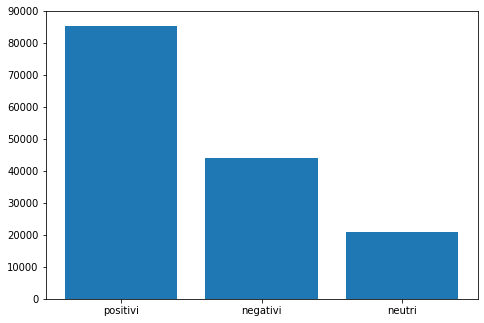

In [138]:
#AFTER OPINION LEXICON 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['positivi', 'negativi', 'neutri']
val = [85322,43936,20742]
axes = plt.gca()
axes.set_ylim([0,90000])
ax.bar(langs,val)

<BarContainer object of 3 artists>

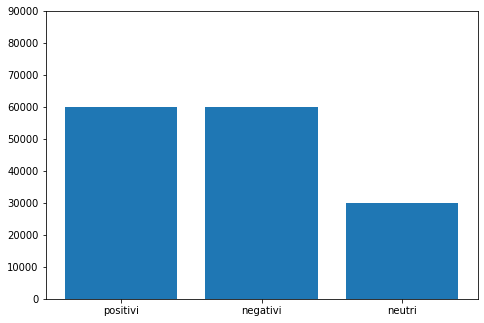

In [139]:
#BEFORE OPINION LEXICON
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['positivi', 'negativi', 'neutri']
val = [60000,60000,30000]
axes = plt.gca()
axes.set_ylim([0,90000])
ax.bar(langs,val)

In [141]:
#RESCALE -13;+22, THE OUTLIERS COULD BE MODIFY THE RESULTS 
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].replace([57, 39, 37, 30, 27, 33, 48, 26, 31, 25, 24, 28, 23, 21 ],[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]) 
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].replace([-22,-24,-37,-23,-34,-20,-19, -15,-14,-16],[-13,-13,-13,-13,-13,-13,-13, -13,-13,-13]) 

In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
amazon_sent['Score_sentiment'] = minmax_scale(amazon_sent['Score_sentiment'], feature_range=(1,5))
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].round() 

In [140]:
print(amazon_sent.loc[amazon_sent["Score_sentiment"] > 3].count())
print(amazon_sent.loc[amazon_sent["Score_sentiment"] < 3].count())
print(amazon_sent.loc[amazon_sent["Score_sentiment"] == 3].count())

3classscore        29387
Score              29387
Text               29387
Score_sentiment    29387
dtype: int64
3classscore        106063
Score              106063
Text               106063
Score_sentiment    106063
dtype: int64
3classscore        14550
Score              14550
Text               14550
Score_sentiment    14550
dtype: int64


In [143]:
amazon_sent['Score_sentiment'].value_counts()

3.0    104721
2.0     43946
4.0      1215
1.0       116
5.0         2
Name: Score_sentiment, dtype: int64

In [144]:
amazon_sent_matrix = amazon_sent.drop(["Text"],axis=1)

In [145]:
amazon_sent_matrix['Score_sentiment'] = amazon_sent_matrix['Score_sentiment'].apply(int)
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].apply(int)

In [146]:
array = confusion_matrix(amazon_sent_matrix['Score'], amazon_sent_matrix['Score_sentiment'])
print(confusion_matrix(amazon_sent_matrix['Score'], amazon_sent_matrix['Score_sentiment']))

[[   35 10925 14003    37     0]
 [   17  9241 15653    89     0]
 [   33 14801 34725   439     2]
 [   22  5095 19516   367     0]
 [    9  3884 20824   283     0]]


<AxesSubplot:>

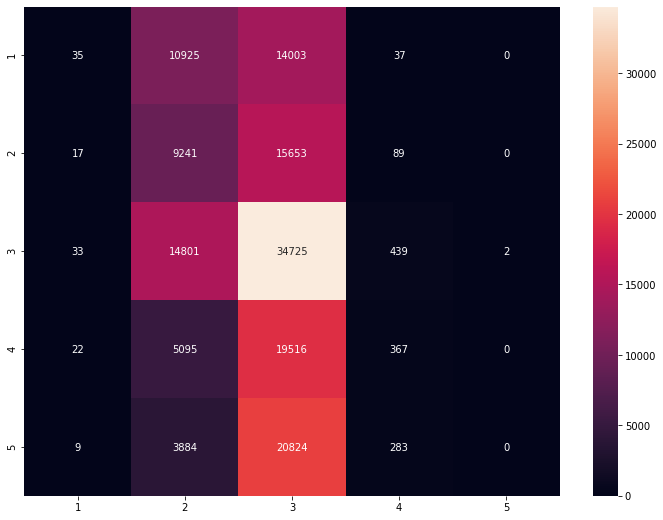

In [147]:
df_cm = pd.DataFrame(array, index = [i for i in "12345"],columns = [i for i in "12345"])
plt.figure(figsize = (12,9))
sns.heatmap(df_cm, annot=True, fmt="d")
#the matrix shows a correct classification of 31772 over 150000 reviews, this approach has an accuracy of 21.18%

In [148]:
amazon_sent.loc[amazon_sent['Score_sentiment'] == 1].head()

3classscore  Score                                               Text  \
526419           -1      1  This is a shame. When Merricks introduced its ...   
407458           -1      1  Holy Mother of God.<br /><br />I experienced t...   
526419           -1      1  This is a shame. When Merricks introduced its ...   
362746           -1      1  Gave my dog "Severe" diarrhea, and cost me a B...   
526071           -1      1  I just received my order.  Big box for 2 ounce...   

        Score_sentiment  
526419                1  
407458                1  
526419                1  
362746                1  
526071                1

In [149]:
amazon_sent.loc[amazon_sent['Score_sentiment'] == 5].head()

3classscore  Score                                               Text  \
545890            0      3  PROS:<br />Added sweetness without the added c...   
545890            0      3  PROS:<br />Added sweetness without the added c...   

        Score_sentiment  
545890                5  
545890                5